# **Graduate Rotational Internship Program(GRIP) @ The Sparks Foundation**

# **Data Science and Business Analytics Intern**

# **Task 2:- Prediction Using Unsupervised Machine Learning**

## **Author:- Gowtham Vinayagamurthy**

### **Aim**
- To predict the optimum number of clusters from the given Iris dataset and represent it visually

### **Programing Language:- Python**

### **Intergrated Development Environment (IDE):- Jupyter Notebook**

### **Dataset:- https://bit.ly/3kXTdox**

### **Unsupervised Machine Learning**
Unsupervised Machine Learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.

### **K-Means Clustering**
K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters. K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster.

In [54]:
# Importing the libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [55]:
# Load the iris dataset
df = pd.read_csv('Iris.csv')
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### **EDA:-**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [57]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [58]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [59]:
df.tail()
df.shape
df.columns
df['Species'].unique()
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**This is an unsuperwised machine learning so we can drop the column Id**

In [60]:
iris=pd.DataFrame(df)
iris_df=iris.drop(columns=["Id"])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### **Visualization of Data:-**

In [61]:
df = df.drop(['Id'], axis=1)
df['Species'] = df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2) 
df.sample(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
128,6.4,2.8,5.6,2.1,2
64,5.6,2.9,3.6,1.3,1
122,7.7,2.8,6.7,2.0,2
35,5.0,3.2,1.2,0.2,0
32,5.2,4.1,1.5,0.1,0
115,6.4,3.2,5.3,2.3,2
111,6.4,2.7,5.3,1.9,2
53,5.5,2.3,4.0,1.3,1
63,6.1,2.9,4.7,1.4,1
46,5.1,3.8,1.6,0.2,0


**Pair Plot** <br>
A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlations

C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1000x500 with 0 Axes>

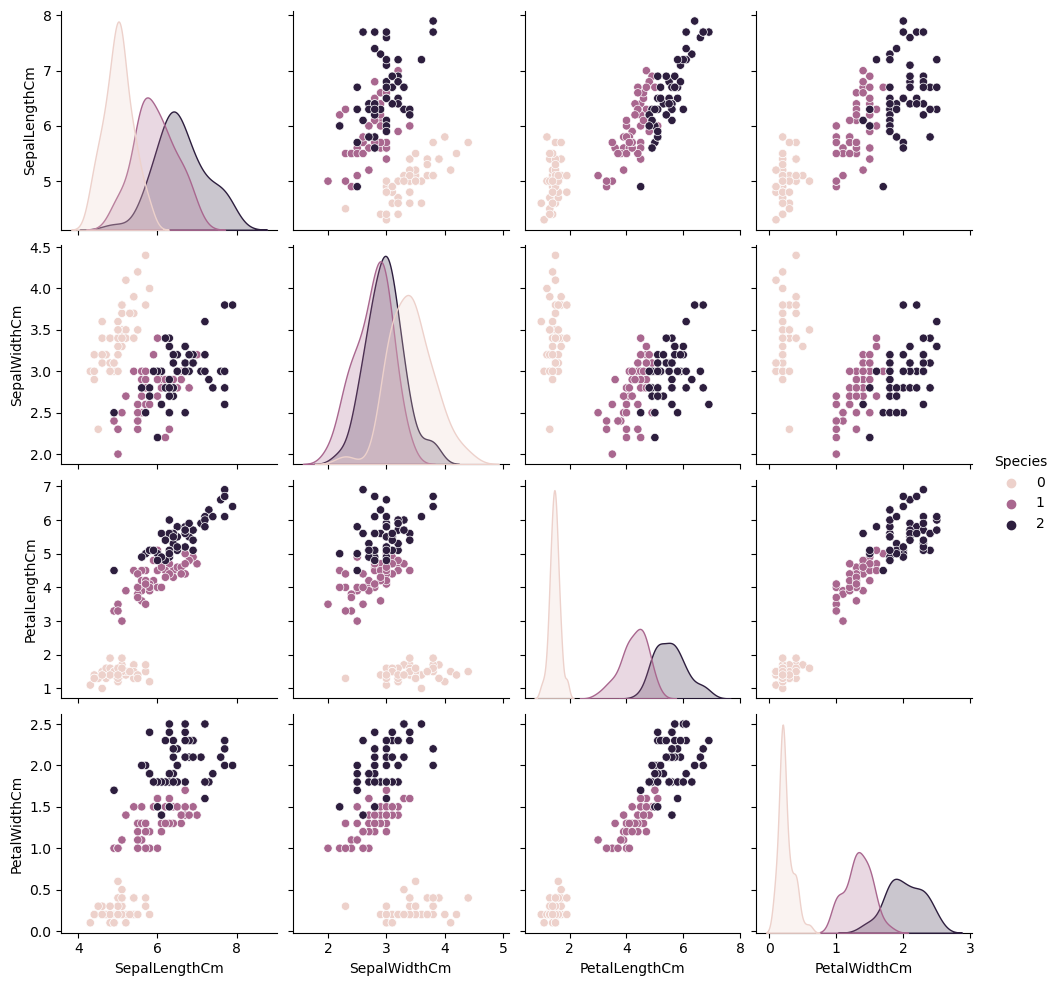

In [62]:
plt.figure(figsize=(10, 5))
sns.pairplot(df, hue='Species')
plt.show()

**Violin Plot** <br>
A violin plot plays a similar activity that is pursued through whisker or box plot do. As it shows several quantitative data across one or more categorical variables. It can be an effective and attractive way to show multiple data at several units. A “wide-form” Data Frame helps to maintain each numeric column which can be plotted on the graph. It is possible to use NumPy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes.

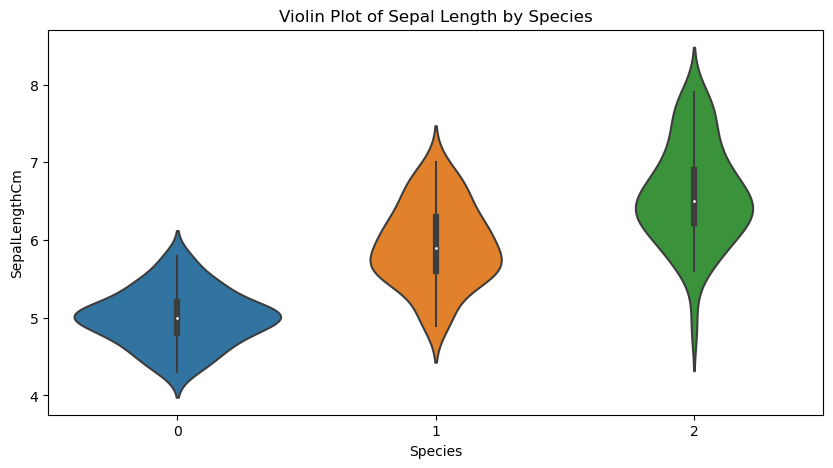

In [63]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

**Box Plot** <br>
A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution

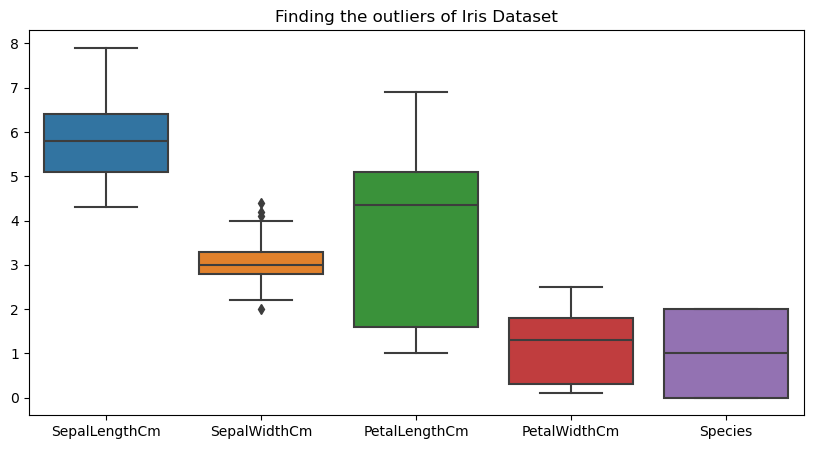

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Finding the outliers of Iris Dataset')
plt.show()

#### **Elbow Method** <br>
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. Since we do not have any predefined number of clusters in unsupervised learning. We tend to use some method that can help us decide the best number of clusters.  In the case of K-Means clustering, we use Elbow Method for defining the best number of clustering 

**Elbow Method in K-Means Clustering** <br>
As we know in the k-means clustering algorithm we randomly initialize k clusters and we iteratively adjust these k clusters till these k-centroids riches in an equilibrium state. However, the main thing we do before initializing these clusters is that determine how many clusters we have to use. For determining  K(numbers of clusters) we use Elbow method.  Elbow Method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value. Now For determining the best number of clusters(k) we plot a graph of k versus their WCSS value. Surprisingly the graph looks like an elbow (which we will see later). Also, When k=1 the WCSS has the highest value but with increasing k value WCSS value starts to decrease. We choose that value of k from where the graph starts to look like a straight line.

In [65]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

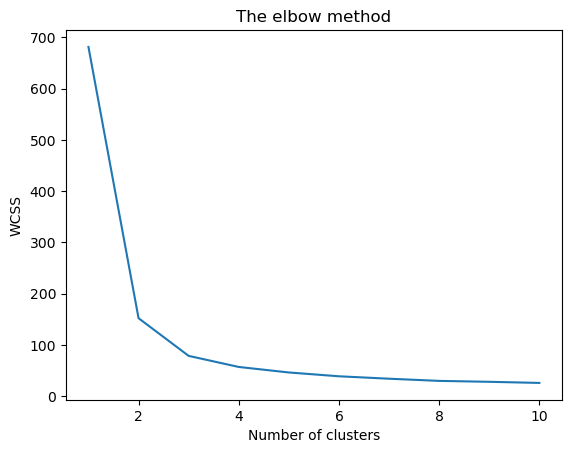

In [67]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

**From this we choose the number of clusters as 3**

In [68]:
# Applying kmeans to the optimum number of cluster
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

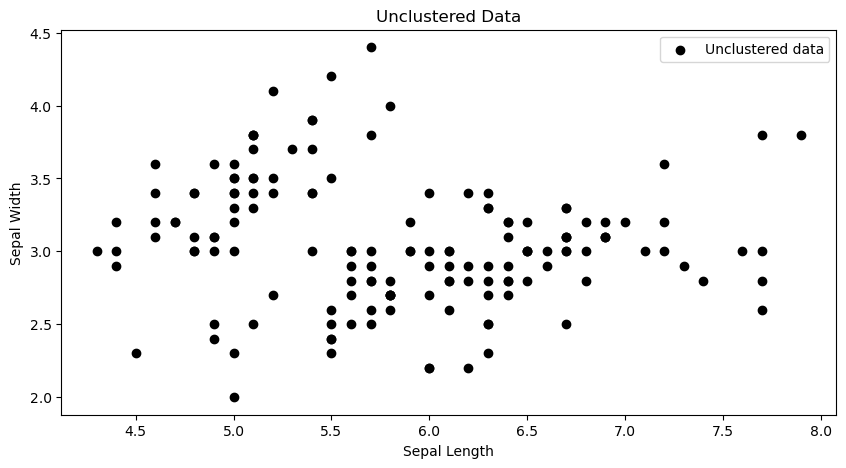

In [69]:
# Groups Before clustering
plt.figure(figsize=(10,5))
plt.scatter(x[:,0], x[:,1], c='black', label='Unclustered data')
plt.title('Unclustered Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

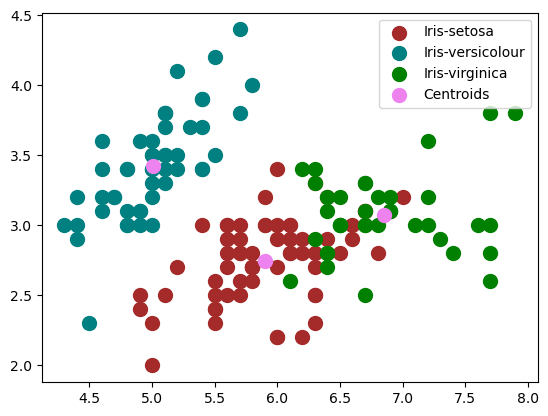

In [70]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'teal', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'violet', label = 'Centroids')

plt.legend()

#### **Silhouette Score:-**
The silhouette score is a metric used to evaluate the quality of clustering performed by K-means. It essentially measures how well data points are grouped within their assigned clusters compared to data points in other clusters. A general rule of thumb is that a silhouette score above 0.5 indicates a good clustering, a silhouette score below 0.25 indicates a bad clustering, and a silhouette score between 0.25 and 0.5 indicates a fair clustering.

In [71]:
from sklearn.metrics import silhouette_score
silhouette_score(x, kmeans.labels_)

0.5528190123564095

#### **K-Means Inertia:-**

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

In [72]:
kmeans.inertia_

78.851441426146